# Feature Importance

In this part, I implemented some classification machine learning techniques referring to lecture notes in order to see the variable importance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
regular = pd.read_csv('regular.csv')
regular = regular.drop(['pts','fgm','ftm','ast'],axis=1)

In [3]:
winning = regular[regular['wl_home'] == 1]
losing = regular[regular['wl_home'] == 0]

In [5]:
features = ['fga','fta','reb','stl','tov','pf']

In [6]:
for feature in features:
    t_stat, p_value = stats.ttest_ind(winning[feature], losing[feature], equal_var=False)
    
    print("Feature:", feature)
    print("T-statistic:", t_stat)
    print("P-value:", p_value)

    if p_value < 0.05:
        print("The feature", feature, "is statistically significant.")
    else:
        print("The feature", feature, "is not statistically significant.")

Feature: fga
T-statistic: -22.546582968052256
P-value: 8.485575711299544e-112
The feature fga is statistically significant.
Feature: fta
T-statistic: 51.11134208339771
P-value: 0.0
The feature fta is statistically significant.
Feature: reb
T-statistic: 77.99453021091574
P-value: 0.0
The feature reb is statistically significant.
Feature: stl
T-statistic: 44.19087987657338
P-value: 0.0
The feature stl is statistically significant.
Feature: tov
T-statistic: -35.153025775509136
P-value: 2.9174101281515056e-266
The feature tov is statistically significant.
Feature: pf
T-statistic: -48.27758966907435
P-value: 0.0
The feature pf is statistically significant.


In [7]:
from sklearn.model_selection import train_test_split
X = regular.iloc[:, 1:] # 
y = regular.iloc[:,0] # wl_home
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


model_bay = GaussianNB().fit(X_train, y_train)
model_rf = RandomForestClassifier().fit(X_train, y_train)
model_gb = GradientBoostingClassifier(learning_rate=0.3, max_depth=3, n_estimators=100).fit(X_train,y_train)

In [9]:
# https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
from sklearn.inspection import permutation_importance
imps_gb = permutation_importance(model_bay, X_train, y_train)

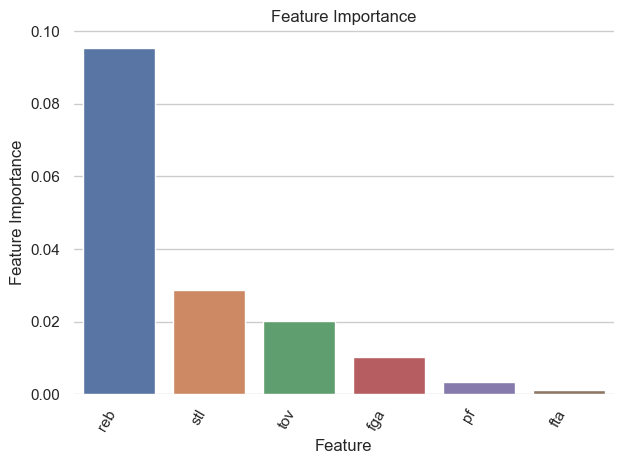

In [10]:
hist_bay = pd.DataFrame({'Feature': X.columns, 'Feature importance': imps_gb.importances_mean})
hist_bay = hist_bay.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=hist_bay)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

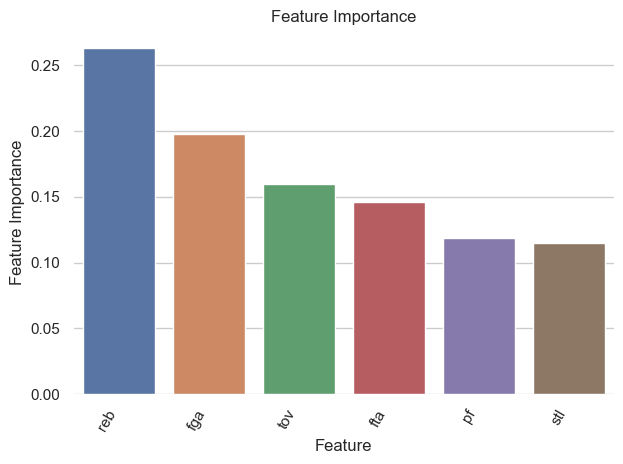

In [11]:
hist_rf = pd.DataFrame({'Feature': X.columns, 'Feature importance': model_rf.feature_importances_})
hist_rf = hist_rf.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=hist_rf)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()

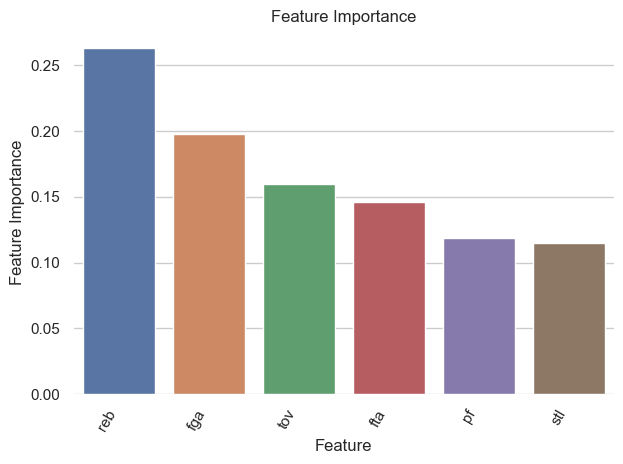

In [12]:
hist_gb = pd.DataFrame({'Feature': X.columns, 'Feature importance': model_gb.feature_importances_})
hist_gb = hist_gb.sort_values(by='Feature importance',ascending=False)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
sns.barplot(x="Feature", y="Feature importance", data=hist_rf)

plt.title("Feature Importance")
ax.set(xlabel="Feature", ylabel="Feature Importance")

sns.despine(left=True, right = True , top = True, bottom=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right')
fig.tight_layout()